loading some of the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



We are going to grab a dataset from UCI. This is the iris dataset and has some measurements and statistics for three different types of Iris. Let's load it into pandas, add some column names and take a look at the first few rows.

In [3]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url, header = None)
cols=['sepal_length', 'sepal_width', 'petal_length' ,'petal_width', 'class']
iris.columns = cols  

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


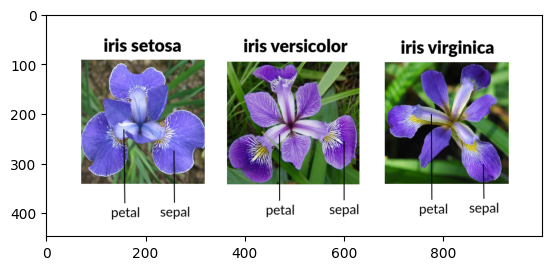

In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as mpimg

url='https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
imgplot = plt.imshow(img)
plt.show()

Starting with a histogram we can look at the distribution of sepal lengths across all of the flowers.

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

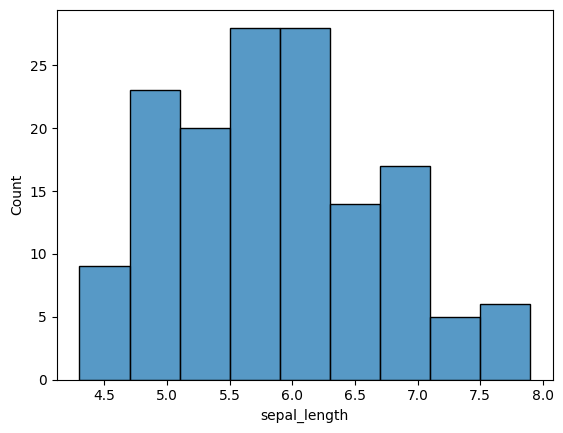

In [5]:
sns.histplot(data = iris, x = 'sepal_length')

What if we wanted to see the distribution for each of the different iris types? We can add the class to the hue argument.

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

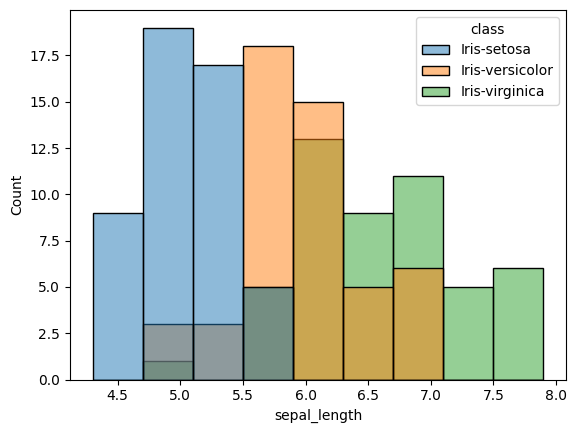

In [6]:
sns.histplot(data = iris, x = 'sepal_length', hue = 'class')

In [ ]:
sns.histplot(data = iris, x = 'sepal_length')

We could also plot each Iris' values in its own subplot. But this isn't a very useful comparison because our X axis is different for each of the plots.

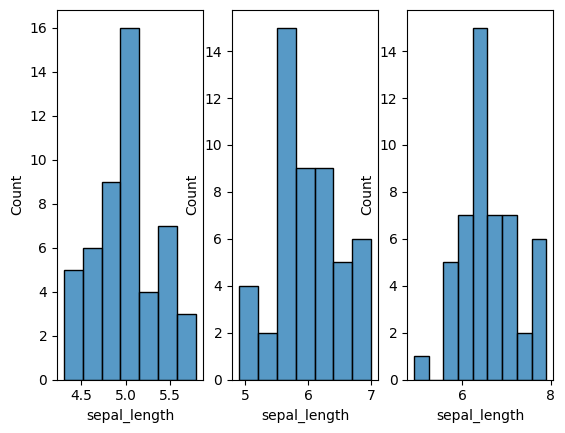

In [7]:
setosa = iris[iris['class']== 'Iris-setosa']
virginica = iris[iris['class']== 'Iris-virginica']
versicolor = iris[iris['class']== 'Iris-versicolor']
# call histplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)

sns.histplot(data = setosa, x = 'sepal_length', ax=ax1)
sns.histplot(data = versicolor, x = 'sepal_length', ax=ax2)
sns.histplot(data = virginica, x = 'sepal_length', ax=ax3)

plt.show()

Using the bidwidth and bin range we can force each plots bins to be the same allowing us to compare the shapes better. The plots are starting to run into each other though.

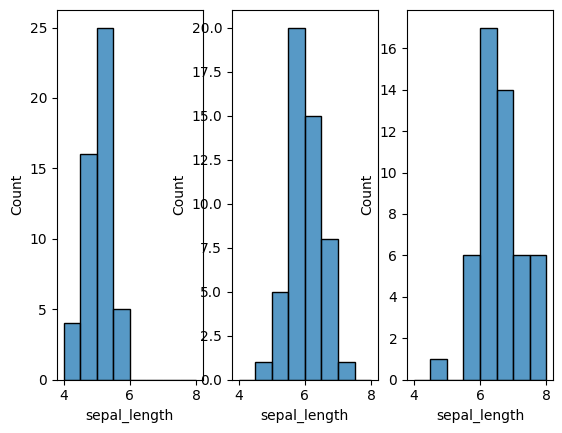

In [8]:
# call histplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)

sns.histplot(data = setosa, x = 'sepal_length', ax=ax1, binwidth = .5, binrange =(4,8) )
sns.histplot(data = versicolor, x = 'sepal_length', ax=ax2, binwidth = .5, binrange =(4,8) )
sns.histplot(data = virginica, x = 'sepal_length', ax=ax3, binwidth = .5, binrange =(4,8) )

plt.show()

Since seaborn is built on top of matplotlib we can still us some matplot commands to clean up our figure. Here we are adding some padding to the figure. This looks better but is there another way we could intuitively view this comparison?

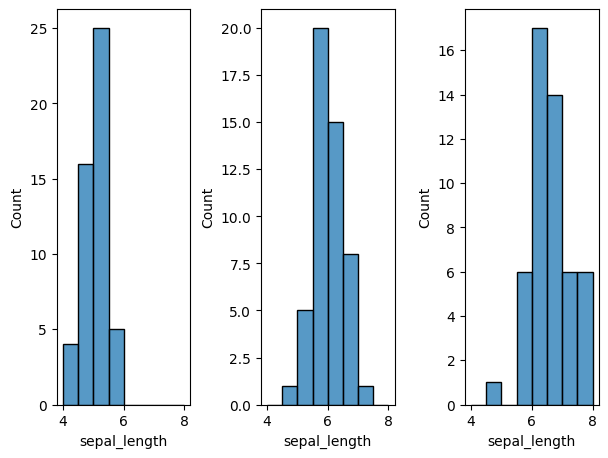

In [9]:
# call histplot on each axes
import matplotlib.ticker as plticker

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.tight_layout( pad = 2)
sns.histplot(data = setosa, x = 'sepal_length', ax=ax1, binwidth = .5, binrange =(4,8) )
sns.histplot(data = versicolor, x = 'sepal_length', ax=ax2, binwidth = .5, binrange =(4,8) )
sns.histplot(data = virginica, x = 'sepal_length', ax=ax3, binwidth = .5, binrange =(4,8) )

plt.show()

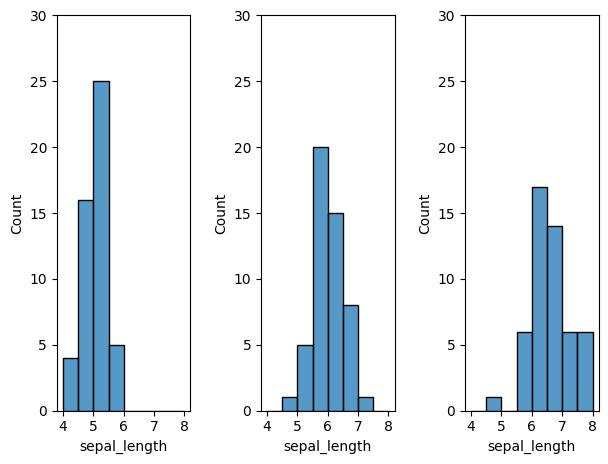

In [10]:
# call histplot on each axes
import matplotlib.ticker as plticker

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.tight_layout( pad = 2)
sns.histplot(data = setosa, x = 'sepal_length', ax=ax1, binwidth = .5, binrange =(4,8) )
sns.histplot(data = versicolor, x = 'sepal_length', ax=ax2, binwidth = .5, binrange =(4,8) )
sns.histplot(data = virginica, x = 'sepal_length', ax=ax3, binwidth = .5, binrange =(4,8) )
#set ylimits
ax1.set_ylim([0, 30])
ax2.set_ylim([0, 30])
ax3.set_ylim([0, 30])
#set xaxis ticks
loc = plticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc)
plt.show()

I think a box plot is pretty useful here and help us see this.

<AxesSubplot: xlabel='sepal_length', ylabel='class'>

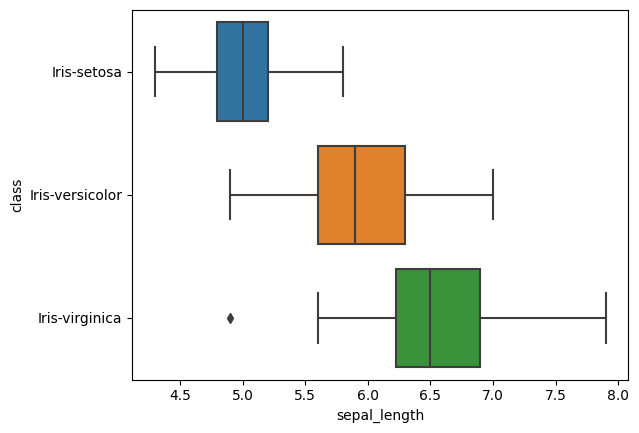

In [11]:
sns.boxplot(data = iris, x="sepal_length", y="class")

<AxesSubplot: xlabel='class', ylabel='sepal_length'>

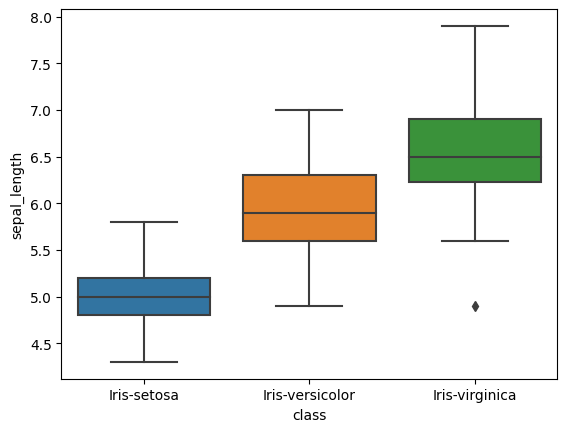

In [12]:
sns.boxplot(data = iris, x="class", y="sepal_length", orient="v")

Now, what if we wanted to see the relationship between the petal length and the petal width. Here we are better off using a scatterplot. This is great but lets add some more context by seeing what class is what.

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

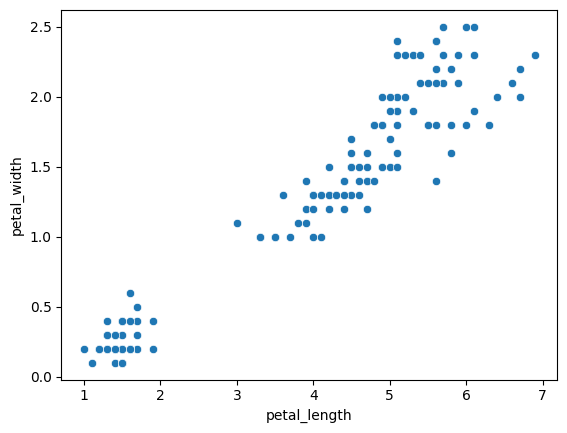

In [13]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width")

Adding the class to the hue I can see that virginica appears to have wider and longer petals than setosa. What about it's sepal size? Can i see that in this graph too?

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

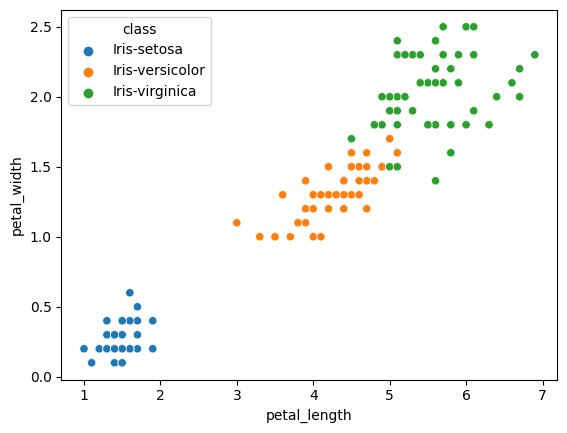

In [14]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="class")

We can sepal length as a size argument and we can see that the size of the marker increases with the length of the sepal. The only issue is now my legend is really cluttering my plot and covering some data points.

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

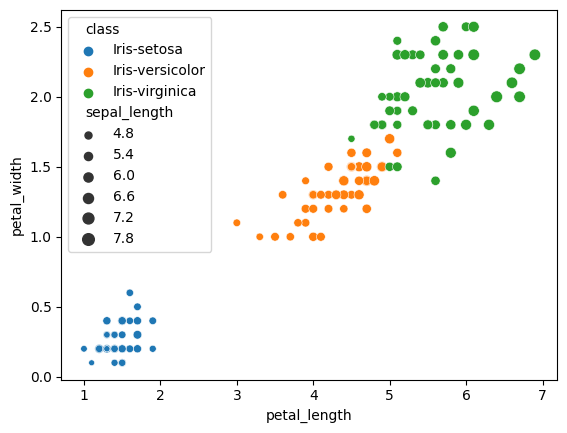

In [15]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="class", size='sepal_length')

Let's modify the legend and anchor it onto the upper left of the plot. Much better. But we are starting to look at the relation of multiple variable. We should probably look at other chart options.

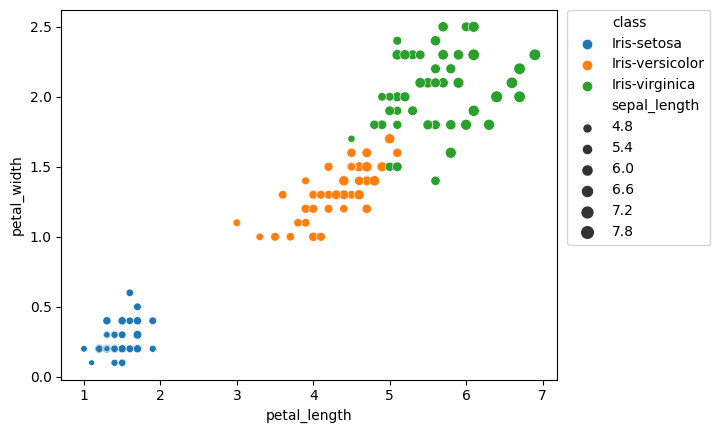

In [16]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="class", size='sepal_length')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

We can use a scatterplot matrix or a "pair plot" to help us look at the relationship between multiple variables at a time.

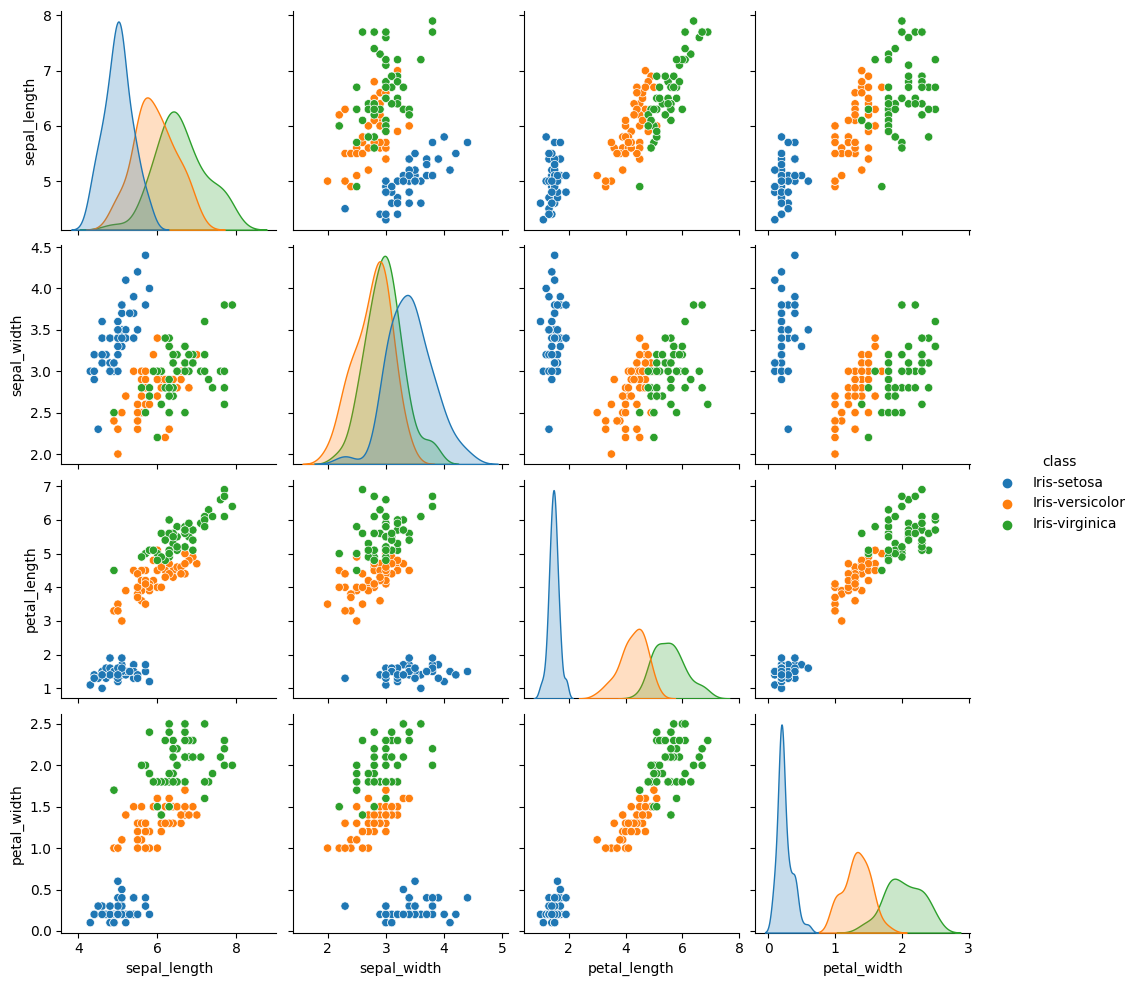

In [17]:
sns.pairplot(iris, hue="class")